In [1]:
import requests
import pandas as pd
import numpy as np
import json
from datetime import datetime
import time
import math
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/Yassine Lahniche/Desktop/PLBD/datasets/Solar Power Plant Data.csv")
df

,Day of Year,Year,Month,Day,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
0,245,2008,9,1,1,False,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,245,2008,9,1,4,False,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,245,2008,9,1,7,True,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,245,2008,9,1,10,True,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,245,2008,9,1,13,True,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,243,2009,8,31,10,True,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,243,2009,8,31,13,True,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,243,2009,8,31,16,True,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,243,2009,8,31,19,True,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677


In [3]:
def calculate_wind_power(wind_speed, air_density, turbine_radius, efficiency):
    swept_area = np.pi * turbine_radius**2  # A = πR²
    power = 0.5 * air_density * swept_area * wind_speed**3 * efficiency  # Wind power formula
    return power/1000

def Process_data(df):
    R = 287.05
    df['Temperature_K'] = ((df.iloc[:, 7] - 32) / 1.8)+ 273.15  # Convert temperature to Kelvin
    df['Density'] = df.iloc[:, 14]*3386.39 / (R * df['Temperature_K'])  # Calculate air density
    df['Wind_power'] = df.apply(lambda row: calculate_wind_power(
        row['Average Wind Speed (Period)'],  # Replace 'Wind_speed' with the actual column name
        row['Density'],
        turbine_radius=60,
        efficiency=0.4
    ), axis=1)

In [4]:
Process_data(df)

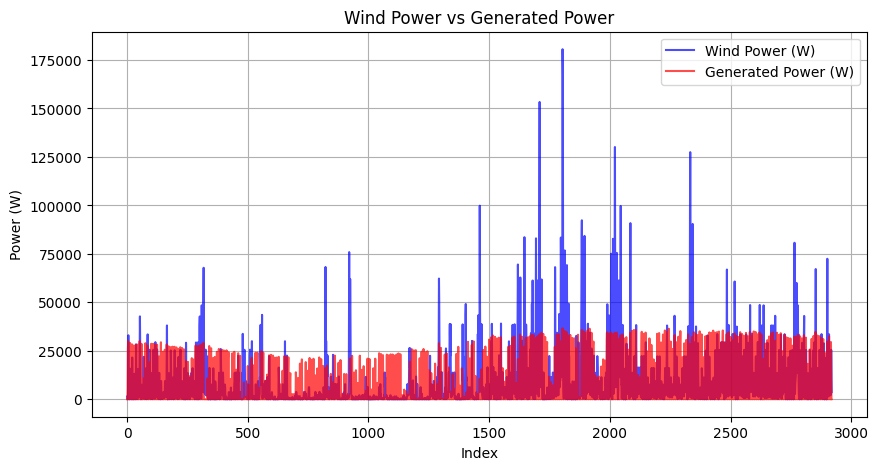

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Wind_power'], label='Wind Power (W)', color='blue', alpha=0.7)
plt.plot(df.index, df['Power Generated'], label='Generated Power (W)', color='red', alpha=0.7)
plt.xlabel("Index")
plt.ylabel("Power (W)")
plt.title("Wind Power vs Generated Power")
plt.legend()
plt.grid(True)
plt.show()


In [6]:
df.to_csv("Data.csv" , index=False)